<!-- Notebook Header Start -->

<h1 align="center">Spike Sorting</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---

## 📜 Project Overview

(to populate) 

- **Objective:** (to populate)
- **Scope:** (to populate)

---

## 📊 Notebook Outline

1. **Data Import & Preprocessing**


---

## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 📈 Importing Libraries & Data
---

### imports

In [ ]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import Kilosort_wrapper
from automations import SpikeInterface_wrapper
from automations import plots

### probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 🔁 Example: Review of Every Trial in a Rat of Choice

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### filepath definitions

In [3]:
channel_mapping = pd.read_excel(r"D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\Adapter_pinout.xlsx",
                                sheet_name="summary",
                                header=2).iloc[:,[8,10,12,14]]
channel_mapping.head(5)

,A1x32 Probe.1,A32->O32 Adapter.1,Intan Board,Intan Input.1
0,32,32,T13,19
1,31,30,T14,20
2,30,31,B13,28
3,29,28,T15,21
4,28,29,B14,27


### importing the rat

In [4]:
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")

Reading DRGS_10_240911_155921...
Error reading stream 2 for DRGS_10_240911_155921. continuing...
Reading DRGS_11_240911_160638...
Error reading stream 2 for DRGS_11_240911_160638. continuing...
Reading DRGS_1_240911_144910...
Error reading stream 2 for DRGS_1_240911_144910. continuing...
Reading DRGS_2_240911_145808...
Error reading stream 2 for DRGS_2_240911_145808. continuing...
Reading DRGS_3_240911_150506...
Error reading stream 2 for DRGS_3_240911_150506. continuing...
Reading DRGS_4_240911_151137...
Error reading stream 2 for DRGS_4_240911_151137. continuing...
Reading DRGS_5_240911_151925...
Error reading stream 2 for DRGS_5_240911_151925. continuing...
Reading DRGS_6_240911_152522...
Error reading stream 2 for DRGS_6_240911_152522. continuing...
Reading DRGS_7_240911_153255...
Error reading stream 2 for DRGS_7_240911_153255. continuing...
Reading DRGS_8_240911_154319...
Error reading stream 2 for DRGS_8_240911_154319. continuing...
Reading DRGS_9_240911_155057...
Error reading 

In [5]:
# for example, pulling the amp data from the 7th DRGS trial (only works for DW333)
# DW322.mat_files_dict["VF_DRG__145435"]["AM"]["amp"][0, 0][0, 0]

In [6]:
DW323.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [7]:
DW323.drgs_trial_notes.head()

5,Trial Number,Condition,amp (uA),PW (us),Freq. (Hz),Dur. (s),Stimuli,Stage,Stimuli Dur.,rcrtrange,waitime
Trial Number,,,,,,,,,,,
1,1,DRGS,70,300,5,180,NaN,NaN,NaN,"69,77",30
2,2,DRGS,70,300,5,180,NaN,NaN,NaN,"69,77",30
3,3,DRGS,70,300,100,180,NaN,NaN,NaN,"69,77",30
4,4,DRGS,70,300,100,180,NaN,NaN,NaN,"69,77",30
5,5,DRGS,70,300,20,180,NaN,NaN,NaN,"69,77",30


In [8]:
DW323.get_sc_data()
DW323.sc_data

{'DRGS_10_240911_155921': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,650,496 samples 
                        288.35s (4.81 minutes) - uint16 dtype - 527.98 MiB,
 'DRGS_11_240911_160638': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,745,728 samples 
                        291.52s (4.86 minutes) - uint16 dtype - 533.80 MiB,
 'DRGS_1_240911_144910': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,749,376 samples 
                        258.31s (4.31 minutes) - uint16 dtype - 472.98 MiB,
 'DRGS_2_240911_145808': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,749,376 samples 
                        258.31s (4.31 minutes) - uint16 dtype - 472.98 MiB,
 'DRGS_3_240911_150506': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,751,424 samples 
                        258.38s (4.31 minutes) - uint16 dtype - 473.11 MiB,
 'DRGS_4_240911_151137': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,847,680 sam

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [9]:
signals = SpikeInterface_wrapper(DW323, SAVE_DIRECTORY)
spikes = Kilosort_wrapper(SAVE_DIRECTORY, PROBE_DIRECTORY)


Preparing SpikeInterface wrapper for rat DW323
Preparing Kilosort wrapper...


Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_10_240911_155921\DW323_DRGS_10_240911_155921_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_11_240911_160638\DW323_DRGS_11_240911_160638_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_1_240911_144910\DW323_DRGS_1_240911_144910_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_2_240911_145808\DW323_DRGS_2_240911_145808_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_3_240911_150506\DW323_DRGS_3_240911_150506_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_4_240911_151137\DW323_DRGS_4_240911_151137_data.bin
Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_5_240911_151

kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\binary\DRGS_10_240911_155921\DW323_DRGS_10_240911_155921_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------------

|
|
|
|
|
|
Running kilosort on DRGS_10_240911_155921
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 8650496
kilosort.run_kilosort: N seconds: 288.3498666666667
kilosort.run_kilosort: N batches: 145
kilosort.run_kilosort: Preprocessing filters computed in  0.48s; total  0.48s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.60 %
kilosort.run_kilosort: Memory:       59.64 %     |     28.59   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   14.22 %     |      1.14   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     1.47 %     |      0.12   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilo

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Data\\CMU.80 Data\\88 Analyzed Data\\88.002 Multi rat kilosort export\\figures\\spike_summary_DRGS_10_240911_155921.png'

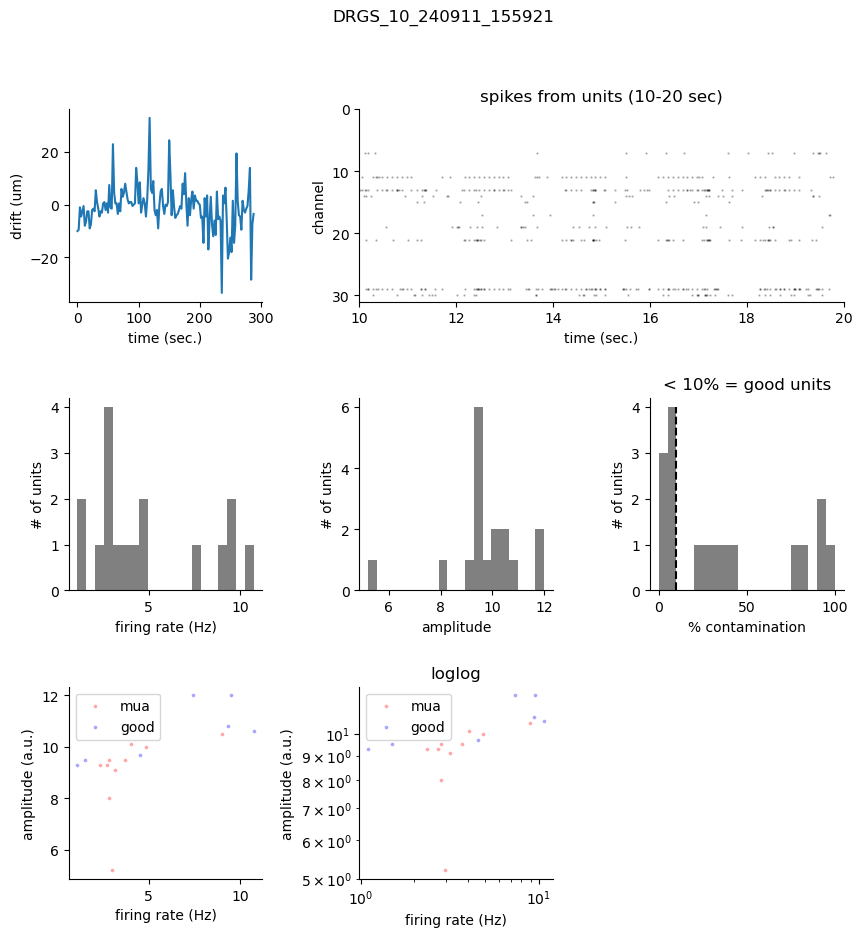

In [10]:
# analysis.save_spinalcord_data_to_binary(TRIAL_NAMES=["VF_DRG_1_241115_145435",
#                                                      "VF_DRG_1_241115_145435",
#                                                      "VF_DRG_1_241115_145739",
#                                                      "VF_DRG_4_241115_153512",
#                                                      "VF_DRG_4_241115_170440",
#                                                      ])
signals.save_spinalcord_data_to_binary()
spikes.run_kilosort_trial_summary()

# 🐁 Analysis DRG Stimulation Trial on Rat DW323
---

### defining filepaths

In [ ]:
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW323')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)

In [ ]:
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")
DW323.get_sc_data()

## 🔬 Exploratory Data Analysis (EDA)


see paper for more information. for this experiment, I elected to start my analysis with trial: 

**Rat: DW322 | Trial: DRGS_1_240918_125448**

In [ ]:
DW323.sc_data.keys()

In [ ]:
TRIAL_DRGS = "DRGS_11_240911_160638"
TRIAL_VF = ""

## 📑 metadata - DRGS

In [ ]:
DW323.drgs_experiment_notes

In [ ]:
DW323.drgs_trial_notes.loc[11].to_latex(r"D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW323\tables\drgs_trial_notes.tex",
                                        header=False,
                                        )
DW323.drgs_trial_notes.loc[11]

## 📑 metadata - DRGS

In [ ]:
DW323.qst_experiment_notes

In [ ]:
DW323.qst_trial_notes

## 📈 signals

In [ ]:
DW323.intan_recordings_stream0[TRIAL_DRGS]

In [ ]:
DW323.intan_recordings_stream1[TRIAL_DRGS]

In [ ]:
DW323.intan_recordings_stream3[TRIAL_DRGS]

In [ ]:
DW323.intan_recordings_stream4[TRIAL_DRGS]


In [ ]:
DW323.sc_data[TRIAL_DRGS]

In [ ]:
recording = DW323.sc_data[TRIAL_DRGS]

In [ ]:
# Get all channel IDs
channel_ids = recording.get_channel_ids()

# Find the index of channel 'A-000'
try:
    channel_idx = list(channel_ids).index('A-000')
except ValueError:
    raise ValueError("Channel 'A-000' not found in the recording.")

channel_ids

In [ ]:
# Retrieve gain and offset arrays for all channels
gain_to_uV_array = recording.get_property('gain_to_uV')
offset_to_uV_array = recording.get_property('offset_to_uV')

# Get gain and offset for 'A-000' using the channel index
gain_to_uV = gain_to_uV_array[channel_idx]
offset_to_uV = offset_to_uV_array[channel_idx]
print(gain_to_uV, offset_to_uV)

In [ ]:
# Retrieve the trace for channel 'A-000'
trace = recording.get_traces(channel_ids=['A-000'])  # to get only one datapoint, append with [0]


In [ ]:
# Convert raw data to voltage
voltage = trace * gain_to_uV + offset_to_uV
voltage

In [ ]:
# Get sampling frequency
sampling_rate = recording.get_sampling_frequency()

# Calculate time axis
n_samples = len(voltage)
time = np.arange(n_samples) / sampling_rate  # Time in seconds


In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(time, voltage, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Voltage Trace for Channel A-000')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# plotting pre-drg stim window
start_time = 0
end_time = 25
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# plotting drg stim window
start_time = 25
end_time = 210
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# plotting post-drg stim window
start_time = 265
end_time = 300
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# # don't run yet - might have issues

# import plotly.graph_objects as go
# import numpy as np


# # Create an interactive plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=time.flatten(), y=voltage.flatten(), mode='lines', name='Sin(x)'))

# # Show the interactive plot
# fig.show()


### analysis
---

### Identify Stimulation Times from Digital Channels

Digital 1 - seems to be a start and end time to the experiment

In [ ]:
# Extract the digital channel trace
digital_trace = DW323.intan_recordings_stream4[TRIAL_DRGS].get_traces(channel_ids=['DIGITAL-IN-01'])
plt.plot(digital_trace)

Digital Input 2 - Entire Trace

In [ ]:
# Extract the digital channel trace
digital_trace = DW323.intan_recordings_stream4[TRIAL_DRGS].get_traces(channel_ids=['DIGITAL-IN-02'])
plt.plot(digital_trace)

Digital Input 2 - Pre-Stim Pulses

each of these (9) stimulations has (10) pulse widths.

In [ ]:
plt.plot(digital_trace[150000:700000])

Digital Input 2 - Spacing Between Stimulation

There are about 60,000 samples in the digital trace. that corresponds to each stimulation occuring every (2) seconds. (60,000 samples / 30,000 samples/sec = 2 seconds)

In [ ]:
plt.plot(digital_trace[159500:220000])

Digital Input 2 - Intra-Stim Pulses

there are (10) individual pulses across every 27,000 datapoints. 
27,000 / 9 = 3,000 samples between pulses.
3,000 samples / 30,000 samples / sec = 0.1 seconds 

In [ ]:
plt.plot(digital_trace[159500:186600])

Digital Input 2 - Individual Pulse Width

Stimulation was occuring for (9) datapoints. Sampling frequency = 30kHz.  9 / 30E3 = 0.003 seconds = 300microseconds. This matches our expected pulse width.

In [ ]:
plt.plot(digital_trace[162504:162515])

### Extract Stimulation Times:

In [ ]:
# The digital trace is typically high (1) during a pulse and low (0) otherwise
# We'll find the rising edges where the pulse starts

# Threshold the digital trace to find rising edges
threshold = 0.5  # Adjust based on your data
digital_trace_binary = (digital_trace.astype(int) > threshold).astype(int).flatten()

# Find indices where the digital trace goes from low to high (rising edge)
rising_edges = np.where((digital_trace_binary[:-1] == 0) & (digital_trace_binary[1:] == 1))[0]

# Convert indices to times
sampling_rate = recording.get_sampling_frequency()
stimulation_times = rising_edges / sampling_rate  # Times in seconds

# Inspect the first 50 stimulation times
stimulation_times[:100]

In [ ]:
digital_trace.flatten()[159504:159515]

In [ ]:
rising_edges

### Perform Spike-Triggered Averaging (STA)

Define the Time Window for STA:

In [ ]:
# Define the time window around each stimulation pulse
pre_time = -0.001  # setting it to negative so that I can delay the window 1 ms before the pulse
post_time = 0.005  # 5 ms after the pulse
window_samples = int((pre_time + post_time) * sampling_rate)
window_samples

In [ ]:
# # Parameters for the delayed window
# delay_time = 0.002  # Delay of 2 ms after the rising edge
# window_duration = 0.005  # Window length of 5 ms
# delay_samples = int(delay_time * sampling_rate)  # Convert delay time to samples
# window_samples = int(window_duration * sampling_rate)  # Convert window duration to samples
# window_samples


Extract Windows and Compute the Average:

In [ ]:
# Choose the channel(s) to analyze (e.g., all channels or a specific one)
# For this example, we'll use all channels except the digital channel
channels_to_analyze = ["A-000"] # to analyze them all: [ch for ch in channel_ids]

# Initialize an array to hold the extracted windows
num_stims = len(stimulation_times)
num_channels = len(channels_to_analyze)
windows = np.zeros((num_stims, num_channels, window_samples))

# Loop over each stimulation time and extract the window
for i, stim_time in enumerate(stimulation_times):
    # Convert time to sample index
    stim_sample = int(stim_time * sampling_rate)
    # Define window indices
    start_sample = stim_sample - int(pre_time * sampling_rate)
    end_sample = stim_sample + int(post_time * sampling_rate)
    # Handle boundary conditions
    if start_sample < 0 or end_sample > recording.get_num_frames():
        continue  # Skip if window is out of bounds
    # Extract the window for all channels
    window = recording.get_traces(
        channel_ids=channels_to_analyze,
        start_frame=start_sample,
        end_frame=end_sample
    )
    windows[i] = window.T  # Transpose to match dimensions


Compute the Average ECAP:

In [ ]:
# Compute the average across all stimulation windows
average_ecap = np.mean(windows, axis=0)  # Shape: (num_channels, window_samples)
average_ecap

## Evoked Activity during DRG Stimulation

when the DRG is stimulated, it sends an evoced compound action potential (ECAP) response to the spinal cord (SC) and an antidromic signal through the spinal nerve (SN). Literature demonstrates that at high frequencies, ECAP is attentuated significantly.  

**Questions**

1. 

### ECAP Attenuation

DRG stim is a series of pulses. After each pulse, check to see the response of the nerve. If you do this over each window, you will get a response over time. This will be a TON of windows, so you will want to take an average per second. this is called spike trigger averaging. This is not a spike sorting approach, but instead, treats the signal collected from 1 channel as a representation of the *compound* activity


## 

## ECAP Recovery After DRG Stimulation

it is shown that DRG stimulation increate the activation threshold (AT)

## Spike Tracking

### Spike Tracking


**Questions**

Perform Spike Sorting on Onset of Stimulation to End of Stimulation. Look at evoked responses over time. Take all of the 32 channels of data from SC. and the amplifier data from B. 

# Von Frey Analysis on DW 322

### Spike Tracking


**Questions**

Perform Spike Sorting on Onset of Stimulation to End of Stimulation. Look at evoked responses over time. Take all of the 32 channels of data from SC. and the amplifier data from B. 